How to Load the dataset?

In [1]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset('conll2003')

     |████████████████████████████████| 270 kB 7.1 MB/s 
     |████████████████████████████████| 243 kB 56.0 MB/s 
     |████████████████████████████████| 1.3 MB 47.5 MB/s 
     |████████████████████████████████| 125 kB 74.1 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 160 kB 67.5 MB/s 
     |████████████████████████████████| 271 kB 62.0 MB/s 


Downloading:   0%|          | 0.00/2.60k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/650k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/146k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/40e7cb6bcc374f7c349c83acd1e9352a4f09474eb691f64f364ee62eb65d0ca6. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

1. First letter cap?
2. Length of word
3. Is a stop word?
4. Number of capital letters
5. Number of dots
6. Number of Hyphens
7. Number of digits
8. Number of letters
9. Pos tag(in numerical form)
10. Is a proper noun?
11. Is a verb?
12. Is a cardinal number?
13. Preceeded by Named Entity?
14. Preceeded by article?
15. Is the first word?

In [2]:
stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [3]:
def get_vector(word,word_vectors,pos,prev_NE,prev_art,is_first):
  vector=[]
  vector.append(1 if word[0].upper()==word[0] else 0) #1. First letter cap?
  vector.append(len(word))#2. Length of word
  vector.append(1 if word in stopwords else 0)#3. Is a stop word?
  vector.append(sum(1 for elem in word if elem.isupper()))#4. Number of capital letters
  vector.append(sum(1 for elem in word if elem=='.'))# 5. Number of dots
  vector.append(sum(1 for elem in word if elem=='-'))#6. Number of Hyphens
  vector.append((sum(1 for elem in word if elem.isnumeric()))/len(word))#7. Number of digits
  vector.append((sum(1 for elem in word if elem.isalpha()))/len(word)) #8. Number of letters
  vector.append(pos)#9. Pos tag(in numerical form)
  if pos ==22:#10. Is a proper noun?
    vector.append(1)
  else:
    vector.append(0)
  if pos >=37 and pos<=42:# 11. Is a verb?
    vector.append(1)
  else:
    vector.append(0) 
  if pos ==11:  #12. Is a cardinal number?
    vector.append(1) 
  else:
    vector.append(0)
  vector.append(prev_NE)#13. Preceeded by Named Entity?
  vector.append(prev_art)#14. Preceeded by article?
  vector.append(is_first)#15. Is the first word?
  word_vectors[word]=vector
  return word_vectors[word]


In [4]:
word_vectors={}
train_X=[]
train_y=[]

In [5]:
for sentence,ner_sentence, pos_sentence in zip(dataset['train'].data['tokens'],dataset['train'].data['ner_tags'],dataset['train'].data['pos_tags']):
                                                                   prev_NE=0
                                                                   prev_art=0
                                                                   is_first=1
                                                                   location=0
                                                                   for word,ner_word,pos_word in zip(sentence,ner_sentence,pos_sentence):
                                                                     location+=1
                                                                     train_X.append(get_vector(word.as_py(),word_vectors,pos_word.as_py(),prev_NE,prev_art,is_first))
                                                                     train_y.append(0 if ner_word.as_py()==0 else 1)
                                                                     prev_NE=ner_word.as_py()
                                                                     if pos_word.as_py()==12:
                                                                       prev_art=1
                                                                     else:
                                                                       prev_art=0
                                                                     is_first=0
                                                                    

In [12]:
from sklearn import svm
clf = svm.SVC(cache_size=10000,C=0.1,gamma=10,class_weight="balanced")

clf.fit(train_X, train_y) # This will take 40 min to train :) 
                          # I have saved the model below using pickle just let me know if you want it
                          # This is how you load it: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

SVC(C=0.1, break_ties=False, cache_size=10000, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Accuracy on Test set

In [13]:
test_X=[]
test_y=[]


In [14]:
for sentence,ner_sentence, pos_sentence in zip(dataset['test'].data['tokens'],dataset['test'].data['ner_tags'],dataset['test'].data['pos_tags']):
                                                                   prev_NE=0
                                                                   prev_art=0
                                                                   is_first=1
                                                                   location=0
                                                                   for word,ner_word,pos_word in zip(sentence,ner_sentence,pos_sentence):
                                                                     location+=1
                                                                     test_X.append(get_vector(word.as_py(),word_vectors,pos_word.as_py(),prev_NE,prev_art,is_first))
                                                                     test_y.append(0 if ner_word.as_py()==0 else 1)
                                                                     prev_NE=ner_word.as_py()
                                                                     if pos_word.as_py()==12:
                                                                       prev_art=1
                                                                     else:
                                                                       prev_art=0
                                                                     is_first=0

              precision    recall  f1-score   support

           0     0.9926    0.9501    0.9709     38323
           1     0.8041    0.9667    0.8779      8112

    accuracy                         0.9530     46435
   macro avg     0.8983    0.9584    0.9244     46435
weighted avg     0.9597    0.9530    0.9547     46435



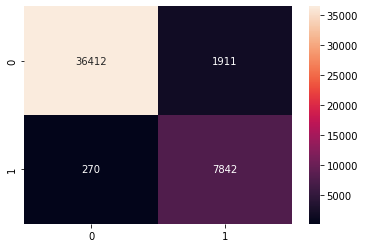

In [15]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

predictions= clf.predict(test_X)
print(classification_report(test_y, predictions,digits=4))
cf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='g')